In [1]:
#Labrary Definition [non mangiare troppo sennò ti scappa la cacca]
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Scene
scene = cv2.imread('./scenes/e2.png',cv2.COLOR_BGR2RGB)

#Load Model
model = cv2.imread('./models/1.jpg',cv2.COLOR_BGR2RGB)


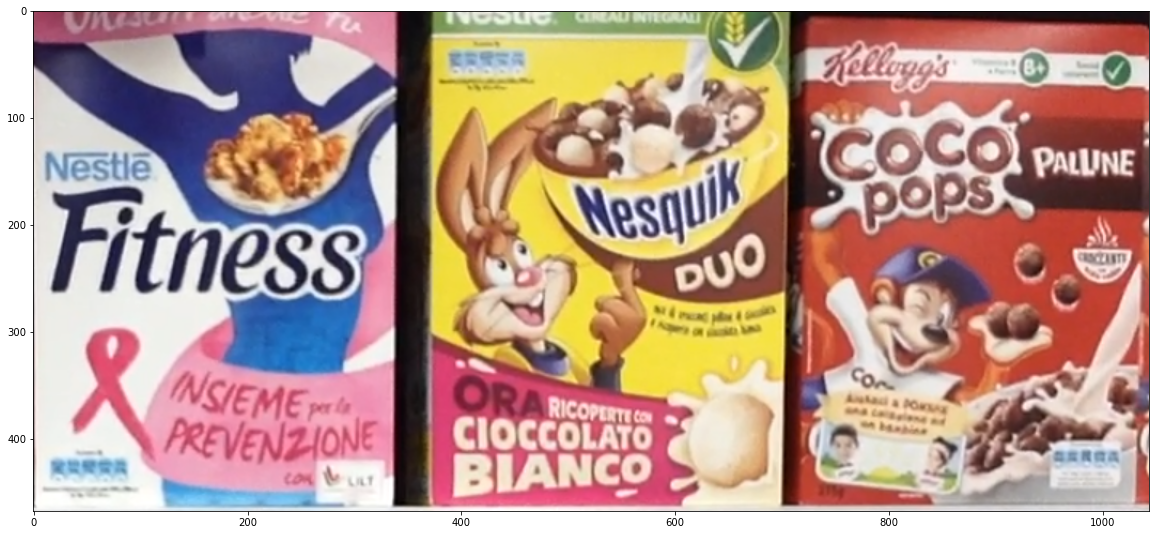

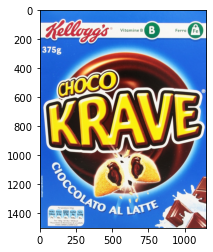

In [3]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

#Plot Model
plt.figure() 
plt.imshow(cv2.cvtColor(model,cv2.COLOR_BGR2RGB))

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(scene,cv2.COLOR_BGR2GRAY)
kp = sift.detect(scene,None)
print(kp[2].pt)
img=cv2.drawKeypoints(scene,kp,scene)

cv2.imwrite('sift_keypoints.jpg',img);

(11.577674865722656, 447.4804992675781)


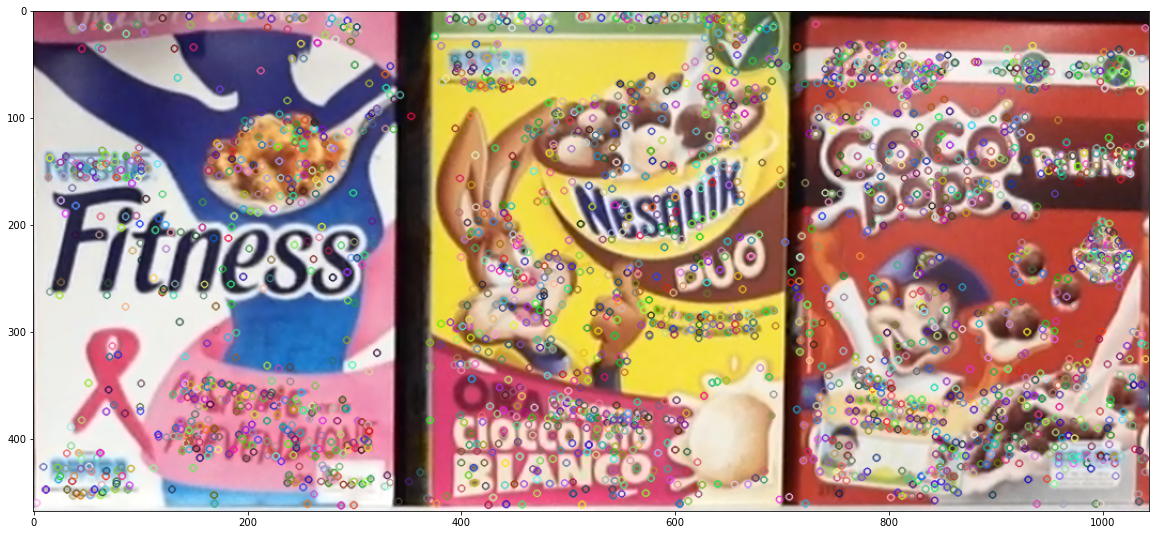

In [5]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv2.cvtColor(scene,cv2.COLOR_BGR2RGB))

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('./models/1.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('./scenes/e3.png',cv2.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)

sift = cv2.xfeatures2d.SIFT_create()


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# Initiate SIFT detector

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)



# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches = flann.knnMatch(des1,des2,k=2)


# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
print(m.queryIdx)
print(kp1[m.queryIdx].pt)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

#src_pts_size = np.float32([ des1[m.queryIdx].size for m in good ])
#dst_pts_size = np.float32([ des2[m.trainIdx].size for m in good ])


src_pts_size = np.float32([ kp1[m.queryIdx].size for m in good ])
dst_pts_size = np.float32([ kp2[m.trainIdx].size for m in good ])


ratio_of_sizes = src_pts_size / dst_pts_size
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(30, 15))
plt.imshow(img3)
plt.show()

print(ratio_of_sizes)
print(src_pts_size)

516
(223.79627990722656, 145.6046142578125)


SystemError: <built-in function drawMatchesKnn> returned NULL without setting an error

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('./models/5.jpg',cv2.COLOR_BGR2RGB) # queryImage
img2 = cv2.imread('./scenes/h1.jpg',cv2.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv2.resize(img1, dsize)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures=5000)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
        
        

        
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
    
    
    
    
    
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(30, 15)),plt.imshow(img3, 'gray'),plt.show()

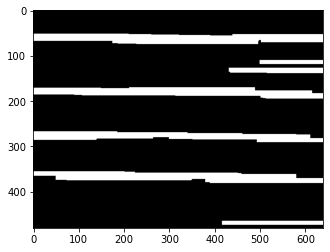

'\n# Step 1\nedges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C,                             cv.THRESH_BINARY, 3, -2)\nshow_wait_destroy("edges", edges)\n# Step 2\nkernel = np.ones((2, 2), np.uint8)\nedges = cv.dilate(edges, kernel)\nshow_wait_destroy("dilate", edges)\n# Step 3\nsmooth = np.copy(vertical)\n# Step 4\nsmooth = cv.blur(smooth, (2, 2))\n# Step 5\n(rows, cols) = np.where(edges != 0)\nvertical[rows, cols] = smooth[rows, cols]\n# Show final result\nshow_wait_destroy("smooth - final", vertical)\n# [smooth]\n'

In [53]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
from matplotlib import pyplot as plt
import math
img_path = './scenes/h1.jpg'
import numpy as np
import sys
import cv2 as cv
def show_wait_destroy(winname, img):
    #cv.imshow(winname, img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
    
    plt.show()
    #cv.moveWindow(winname, 500, 0)
    #cv.waitKey(0)
    #cv.destroyWindow(winname)
# [load_image]
# Check number of arguments

# Load the image
src = cv.imread(img_path, cv.IMREAD_COLOR)
# Check if image is loaded fine
if src is None:
    print ('Error opening image: ' + argv[0])
# Show source image
cv.imshow("src", src)
# [load_image]
# [gray]
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src
# Show gray image
#show_wait_destroy("gray", gray)
# [gray]
# [bin]
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)
# Show binary image
#show_wait_destroy("binary", bw)
# [bin]
# [init]
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)
# [init]
# [horiz]
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 20
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 2))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.erode(horizontal, horizontalStructure)
#horizontal = cv.erode(horizontal, horizontalStructure)
#horizontal = cv.erode(horizontal, horizontalStructure)



horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
'''
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.erode(horizontal, horizontalStructure)
'''
horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)


# Show extracted horizontal lines
show_wait_destroy("horizontal", horizontal)
'''
# [horiz]
# [vert]
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
# Show extracted vertical lines
#show_wait_destroy("vertical", vertical)
# [vert]
# [smooth]
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
show_wait_destroy("vertical_bit", vertical)
'''
'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''
'''
# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 3, -2)
show_wait_destroy("edges", edges)
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
show_wait_destroy("dilate", edges)
# Step 3
smooth = np.copy(vertical)
# Step 4
smooth = cv.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# Show final result
show_wait_destroy("smooth - final", vertical)
# [smooth]
'''


In [1]:
# Check number of arguments
img_path = './scenes/h1.jpg'
import numpy as np
import sys
import cv2 as cv
src = cv.imread(img_path, cv.IMREAD_COLOR)
# Check if image is loaded fine
if src is None:
    print ('Error opening image: ' + argv[0])
# Show source image
cv.imshow("src", src)

In [2]:
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src
# Show gray image
show_wait_destroy("gray", gray)

NameError: name 'show_wait_destroy' is not defined